<center><h3>Abstract</h3></center><br>
This report will discuss about the solver for the currents in a resistor and discusses about the current's dependency on the shape of the resistor and also discusses which part of the resistor is likely to get hottest.Here we analyse the currents in a square copper plate to which a wire is soldered to the middle of it.It also discuss about how to find stopping condition for the solver after certain iterations,and to model the errors obtained using Least Squares 
after analysing the actual errors in semilog and loglog plots.And finally we find the currents in the resistor after applying boundary conditions and analyse the vector plot of current flow and conclude which part of resistor will become hot!.

# Introduction
* A wire is soldered to the middle of a copper plate and its voltage is held at 1 Volt. One side of the plate is rounded, while the remaining are floating. The plate is 1 cm by 1 cm in size.
* To solve for currents in resistor,we use following equations and boundary conditions mentioned below: 
* Conductivity (Differential form of ohm's law)

\begin{equation}
\vec{J} = \sigma\vec{E}
   \end{equation}
* Electric field is the gradient of the potential 

\begin{equation}
\vec{E} = -\nabla{\phi}
   \end{equation}
* Charge Continuity equation is used to conserve the inflow and outflow charges 

\begin{equation}
\nabla.\vec{J} = -\frac{\partial \rho}{\partial t}
   \end{equation}
* Combining the above equations above, we get
   
\begin{equation}
\nabla.(-\sigma\nabla\phi) = -\frac{\partial \rho}{\partial t}
   \end{equation}
* Assuming that our resistor contains a material of constant conductivity, the equation becomes

\begin{equation}
\nabla^{2}\phi = \frac{1}{\sigma}\frac{\partial \rho}{\partial t}
   \end{equation}
* For DC currents, the right side is zero, and we obtain
   
\begin{equation}
\nabla^{2}\phi = 0
   \end{equation}
* Here we use a 2-D plate so the Numerical solutions in 2D can be easily transformed into a difference equation. The equation can be written out in

\begin{equation}
\frac{\partial^{2} \phi}{\partial x^{2}}+ \frac{\partial^{2} \phi}{\partial y^{2}} = 0
 \end{equation}
 
\begin{equation}
\frac{\partial \phi}{\partial x}_{(x_i,y_j)} = \frac{\phi(x_{i+1/2},y_j) - \phi(x_{i-1/2},y_j)}{\Delta x}
 \end{equation} 

\begin{equation}
\frac{\partial^{2} \phi}{\partial x^{2}}_{(x_i,y_j)} = \frac{\phi(x_{i+1},y_j) -2\phi(x_i,y_j)+ \phi(x_{i-1},y_j)}{(\Delta x)^{2}}
 \end{equation} 
* Using above equations we get 

\begin{equation}
        \phi_{i,j} = \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1}}{4} 
\end{equation}
* Thus, the potential at any point should be the average of its neighbours. This is a very
 general result and the above calculation is just a special case of it.
 So the solution process is to take each point and replace the potential by the average of its neighbours. Keep iterating till the solution converges (i.e., the maximum change in elements of $\phi$ which is denoted by $error_k$ in the code ,where 'k' is the no of iteration, is less than some tolerance which is taken as $10^{-8}$).
* At boundaries where the electrode is present, just put the value of potential itself. At boundaries where there is no electrode, the current should be tangential because charge can’t leap out of the material into air. Since current is proportional to the Electric Field, what this means  is the gradient of $\phi$ should be tangential. This is implemented by requiring that $\phi$ should not vary in the
 normal direction 
* At last we solve for currents in the resistor using all these information!

$\vec\nabla.\vec{J}$

# Python Code : 
## Import the Libraries

In [3]:
# load libraries and set plot parameters
from pylab import *
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 6
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.numpoints'] = 2
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.shadow'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = r"\usepackage{subdepth}, \usepackage{type1cm}"

## Question 1
### Part A
* Define the Parameters, I took $N_x = 50$ and $N_y = 50$ and No of iterations : 6000
* These values are taken to discuss about Stopping condition,etc
* To allocate the potential array $\phi = 0$ .Note that the array should have $N_y$ rows and $N_x$ columns.
* To find the indices which lie inside the circle of radius 0.35 using meshgrid() by equation :

\begin{equation}
X ∗ X +Y ∗Y ≤ 0.35^2
\end{equation}
* Then assign 1 V to those indices.
* To plot a contour plot of potential $\phi$ and to mark V=1 region in red 

In [4]:
Nx=50               #size along x
Ny=50               #size along y
radius=0.35         # radius of central lead
Niter=6000          # number of iterations to perform

In [5]:
phi = np.zeros((Ny,Nx))          # initialise potential matrix with zeroes
y = linspace(-0.5,0.5,Ny)        #initialise y range
x = linspace(-0.5,0.5,Nx)        #initialise x range
'''
Here is '-y' is used inplace of y in meshgrid because we need to get (-0.5,0.5)
at the top left corner of the plate, with center being (0,0)
'''
X,Y = meshgrid(x,-y)            # X,Y coordinates
#indices which lie inside circle of r = 0.35
ii = where( square(X) + square(Y) <= pow(radius,2))   
phi[ii] = 1.0                    #assigning V=1 for the circular region

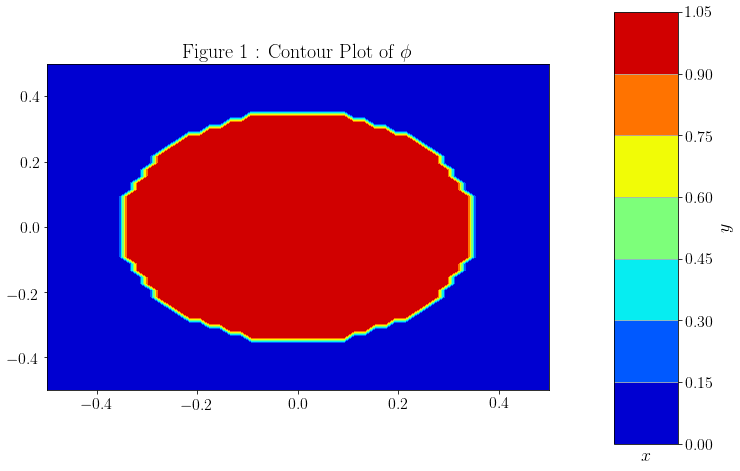

In [6]:
#Plotting contour of potential
fig1 = figure()
ax1 = fig1.add_subplot(111)
plt1 = ax1.contourf(X,Y,phi,cmap=cm.jet)
title("Figure 1 : Contour Plot of $\phi$")
ax1.legend()
cax1 = fig1.add_axes([1, 0,0.1, 1])
fig1.colorbar(plt1,cax=cax1,orientation='vertical')
xlabel("$x$")
ylabel("$y$")
grid()
savefig("Figure1.jpg")
show()

#### Results and Discussion :
* The contour plot of potential becomes smoother i.e it almost becomes circular as we increase $N_x$ and $N_y$,because we get more no of points,so the potential gradient is smoothed out between adjacent points since there are more no of points

### Part B : 
* To Perform the iterations
* To update the potential $\phi$ according to Equation below  using vectorized code
 
\begin{equation}
        \phi_{i,j} = \frac{\phi_{i+1,j} + \phi_{i-1,j} + \phi_{i,j+1} + \phi_{i,j-1}}{4} 
\end{equation}
* To apply Boundary Conditions where there is no electrode, the gradient of $\phi$ should be tangential. This is implemented by Equation given below , basically potential should not vary in the normal direction so we equate the last but row or column to outermost row or column correspondingly when applying boundary conditions for a side of plate,implemented using Vectorized code

\begin{equation}
 \frac{\partial \phi}{\partial n} = 0
\end{equation}
* To plot the errors in semilog and loglog and observe how the errors are evolving.

In [7]:
#function to create Matrix for finding the Best fit using lstsq
# with no_of rows, columns by default  and vector x as arguments
def createAmatrix(nrow,x):
    A = zeros((nrow,2)) # allocate space for A
    A[:,0] = 1
    A[:,1] = x
    return A

In [8]:
# function to find best fit errors using lstsq
def fitForError(errors,x):
    A = createAmatrix(len(errors),x)
    return A,lstsq(A,log(errors))[0]

In [9]:
# Function to compute function back from Matrix and Coefficients A and B
def computeErrorFit(M,c):
    return exp(M.dot(c))

In [10]:
errors = zeros(Niter)            #initialise error array to zeros
iterations = []                  #array from 0 to Niter used for findind lstsq

for k in range(Niter):
    #copy the old phi
    oldphi = phi.copy()
    
    #Updating the potential
    phi[1:-1,1:-1] = 0.25*(phi[1:-1,0:-2]+phi[1:-1,2:]+phi[0:-2,1:-1]+phi[2:,1:-1])
    
    #applying boundary conditions
    phi[1:-1,0] = phi[1:-1,1]           #Left edge
    phi[1:-1,-1] = phi[1:-1,-2]         #right edge
    phi[0,:] = phi[1,:]                 #Top edge
    # Bottom edge is grounded so no boundary conditions 
    
    #Assign 1 V to electrode region
    phi[ii] = 1.0
    
    #Appending errors for each iterations
    errors[k]=(abs(phi-oldphi)).max();
    iterations.append(k)
#end

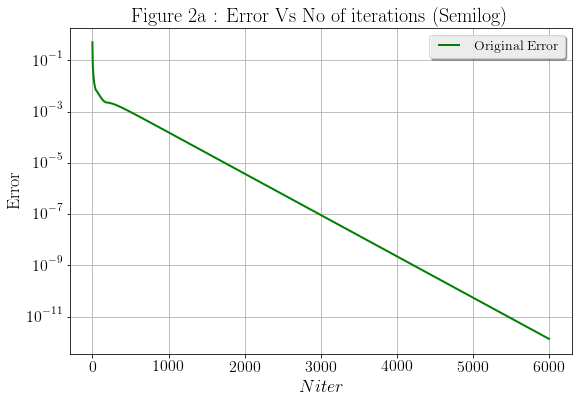

In [11]:
fig2 = figure()
ax2 = fig2.add_subplot(111)

# ax2.semilogy(iterations,error_fit1,'r',markersize = 8,label="Fit1")
ax2.semilogy(iterations,errors,'g',markersize = 8,label="Original Error")

ax2.legend()
title(r"Figure 2a : Error Vs No of iterations (Semilog)")
xlabel("$Niter$")
ylabel("Error")
grid()
savefig("Figure2a.jpg")
show()

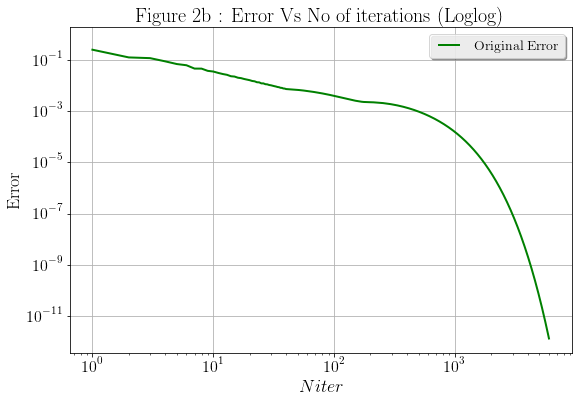

In [12]:
fig2b = figure()
ax2b = fig2b.add_subplot(111)

# ax2b.loglog(iterations,error_fit1,'r',markersize = 8,label="Fit1")
ax2b.loglog(iterations,errors,'g',markersize = 8,label="Original Error")

ax2b.legend()
title(r"Figure 2b : Error Vs No of iterations (Loglog)")
xlabel("$Niter$")
ylabel("Error")
grid()
savefig("Figure2b.jpg")
show()

#### Results and Discussion:
* As we observe the Figure 2a that error decreases linearly for higher no of iterations,so from this we conclude that for large iterations error decreases exponentially with No of iterations i.e it follows $Ae^{Bx}$ as it is a semilog plot
* And if we observe loglog plot the error is almost linearly decreasing for smaller no of iterations so it follows $a^x$ form since it is loglog plot and follows some other pattern at larger iterations.
* So to conclude the error follows $Ae^{Bx}$ for higher no of iterations($\approx$ 500) and it follows $a^x$ form for smaller iterations which can be seen from figure 2a & 2b respectively

### Part C :
* To find the fit using Least squares for all iterations named as **fit1**and for iterations $\geq$ 500 named as **fit2** separately and compare them.
* As we know that error follows $Ae^{Bx}$ at large iterations, we use equation given below to fit the errors using least squares 

\begin{equation}
    logy = logA + Bx
\end{equation}
* To find the time constant of error function obtained for the two cases using lstsq and compare them
* To plot the two fits obtained and observe them

In [13]:
# to find the coefficients of fit1 and fit2
# M1 and M2 are matrices and c1 and c2 are coefficients

M1,c1 = fitForError(errors,iterations)             #fit1
M2,c2 = fitForError(errors[500:],iterations[500:]) #fit2

print("Fit1 : A = %g , B = %g"%((exp(c1[0]),c1[1])))
print("Fit2 : A = %g , B = %g"%((exp(c2[0]),c2[1])))

print("The time Constant (1/B) all iterations considered: %g" % (abs(1/c1[1])))
print("The time Constant (1/B) for higher iterations (from 500) : %g" % (abs(1/c2[1])))

Fit1 : A = 0.00631664 , B = -0.00371103
Fit2 : A = 0.00629419 , B = -0.00370997
The time Constant (1/B) all iterations considered: 269.467
The time Constant (1/B) for higher iterations (from 500) : 269.544


In [14]:
#Calculating the fit using Matrix M and Coefficents C obained
error_fit1 = computeErrorFit(M1,c1)       #fit1
M2new = createAmatrix(len(errors),iterations) 

# Error calculated for all iterations using coefficients found using lstsq
error_fit2 = computeErrorFit(M2new,c2)    #fit2 calculated

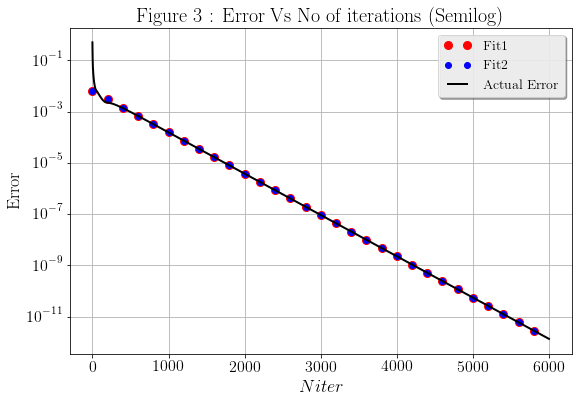

In [15]:
#Plotting the estimated error_fits using lstsq
fig3 = figure()
ax3 = fig3.add_subplot(111)

# plotted for every 200 points for fit1 and fit2
ax3.semilogy(iterations[0::200],error_fit1[0::200],'ro',markersize = 8,label="Fit1")
ax3.semilogy(iterations[0::200],error_fit2[0::200],'bo',markersize = 6,label="Fit2")
ax3.semilogy(iterations,errors,'k',markersize = 6,label="Actual Error")

ax3.legend()
title(r"Figure 3 : Error Vs No of iterations (Semilog)")
xlabel("$Niter$")
ylabel("Error")
grid()
savefig("Figure3.jpg")
show()

#### Results and Discussion:
* As we observe the Fit1's time constant and Fit2's time constant, fit2's is slightly higher than fit1's time constant,so the error decreases slowly at larger iterations compared to fit1.
* Ideally the time constant for fit2 should be larger than fit1 with good margin,since we take less no of points i.e stepsize $N_x$ and $N_y$ being less,we get less difference between their time constants,but if we increase the $N_x$ and $N_y$ to 100,100 respectively I tried and got these results : 
    * time constant for fit1 : 1120.02s
    * time Constant for fit2 (higher iterations from 500) : 1189.62s
* As we see that there is a significance difference between them, since we increased the stepsize to 100!
* So the time constant increase with increase in $N_x$ and $N_y$

### Stopping Condition : 
* To find the cumulative error for all iterations and compare them with some error tolerance to stop the iteration.
* So to find the cumulative error,  we add all the absolute values of errors for each iteration since worst case is, all errors add up
* So we use the equations given below:

\begin{equation}
    Error = \sum_{N+1}^{\infty}error_k
  \end{equation}
* The above error is approximated to

\begin{equation}
    Error \approx -\frac{A}{B}exp(B(N+0.5))
    \end{equation}
where N is no of iteration

In [16]:
def cumerror(error,N,A,B):
    return -(A/B)*exp(B*(N+0.5))

In [17]:
def findStopCondn(errors,Niter,error_tol):
    cum_error = []
    for n in range(1,Niter):
        cum_error.append(cumerror(errors[n],n,exp(c1[0]),c1[1]))
        if(cum_error[n-1] <= error_tol):
            print("last per-iteration change in the error is %g" 
                  %(cum_error[-1]-cum_error[-2]))
            return cum_error[n-1],n
        
    print("last per-iteration change in the error is %g" 
          %(np.abs(cum_error[-1]-cum_error[-2])))
    return cum_error[-1],Niter

In [18]:
error_tol = pow(10,-8)
cum_error,Nstop = findStopCondn(errors,Niter,error_tol)
print("Stopping Condition N: %g and Error is %g" %(Nstop,cum_error))

last per-iteration change in the error is -3.71228e-11
Stopping Condition N: 5107 and Error is 9.98483e-09


#### Results and Discussion :
* So we got Stopping condition as N : 5107 and the total cumulative error till that iteration is  $9.98483*10^{-9}$
* And the last per iteration change in error: $3.71228*10^{-11}$
* So we observe that the  profile was changing very little every iteration, but it was continuously changing. So the cumulative error was still large.
* So that is why this method of solving Laplace’s Equation is known to be one of the worst available. This is because of the very slow coefficient with which the error reduces.

### Part D:  Surface Plot of Potential
* To do a 3-D surface plot of the potential.
* To plot contour plot of potential
* And analyse them and to comment about flow of currents

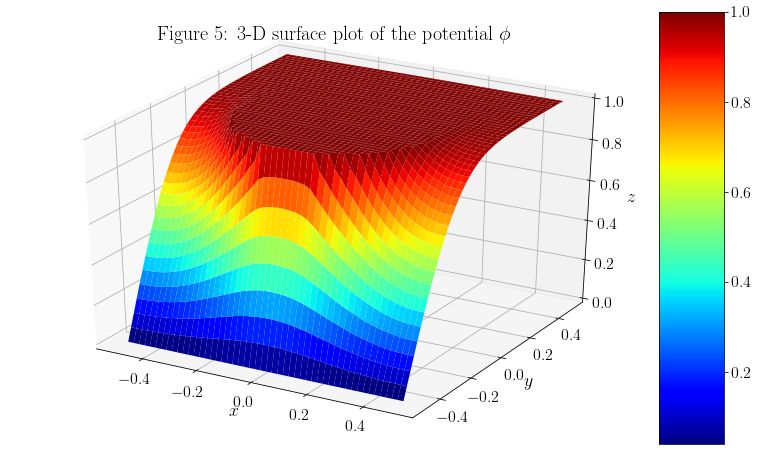

In [19]:
fig5 = figure() # open a new figure
ax5=p3.Axes3D(fig5) # Axes3D is the means to do a surface plot
title("Figure 5: 3-D surface plot of the potential $\phi$")
surf = ax5.plot_surface(X, Y, phi, rstride=1, cstride=1,cmap=cm.jet)
ax5.set_xlabel('$x$')
ax5.set_ylabel('$y$')
ax5.set_zlabel('$z$')
cax = fig5.add_axes([1, 0,0.1, 1])
fig5.colorbar(surf,cax=cax,orientation='vertical')
show()

#### Contour Plot of the Potential: 

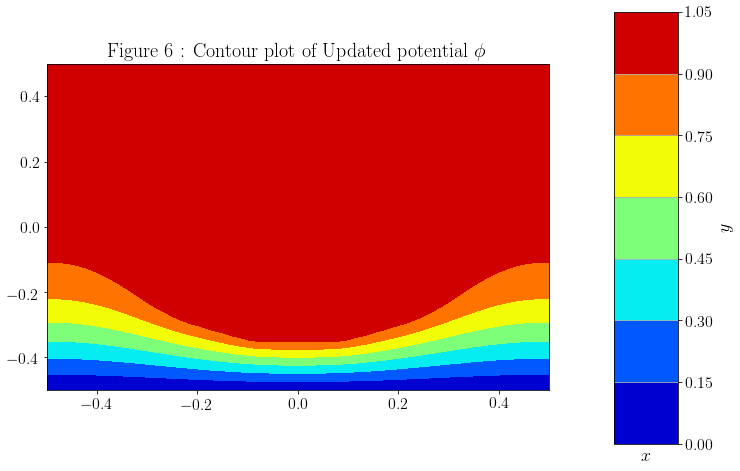

In [20]:
fig6 = figure()
ax6 = fig6.add_subplot(111)
plt6 = ax6.contourf(X,Y,phi,cmap=cm.jet)
title("Figure 6 : Contour plot of Updated potential $\phi$")
cax6 = fig6.add_axes([1, 0,0.1, 1])
fig6.colorbar(plt6,cax=cax6,orientation='vertical')
xlabel("$x$")
ylabel("$y$")
grid()
savefig("Figure6.jpg")
show()

#### Results and Discussion:
* As we observe that the surface plot we conclude that after updating the potential,the potential gradient is higher in down part of the plate since, the down side is grounded and the electrode is at 1 V,so there is high potential gradient from electrode to grounded plate.
* And the upper part of the plate is almost 1 V since they didnt have forced Voltage and their's were floating,so while applying updating we replaced all points by average of surrounding points so the potential is almost 1 V in the upper region of the plate!
* Same observation we see using contour plot in 2 dimensions, we note that there are gradients in down part of the plate and almost negligible gradient in upper part of the plate.

### Part E : Vector Plot of Currents : 
* To obtain the currents by computing the gradient. 
* The actual value of $\sigma$ does not matter to the shape of the current profile, so we set it to unity. Our equations are 

\begin{equation}
    J_x = -\frac{\partial \phi}{\partial x} 
  \end{equation}
  
  \begin{equation}
    J_y = -\frac{\partial \phi}{\partial y} 
  \end{equation}
* To program this we use these equations as follows:
    
   \begin{equation}
        J_{x,ij} = \frac{1}{2}(\phi_{i,j-1} - \phi_{i,j+1}) 
    \end{equation}

    \begin{equation}
        J_{y,ij} = \frac{1}{2}(\phi_{i-1,j} - \phi_{i+1,j}) 
    \end{equation}

In [21]:
Jx = zeros((Ny,Nx))
Jy = zeros((Ny,Nx))

Jx[1:-1,1:-1] = 0.5*(phi[1:-1,0:-2] - phi[1:-1,2:])
Jy[1:-1,1:-1] = 0.5*(phi[2:,1:-1] - phi[0:-2,1:-1])

#### To Plot the current density using quiver, and mark the electrode via red dots : 

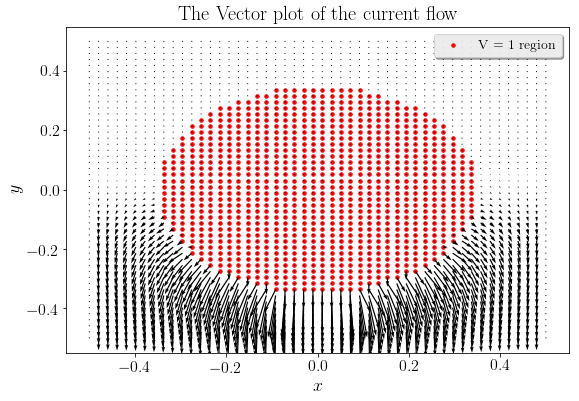

In [24]:
fig7 = figure()
ax7 = fig7.add_subplot(111)

ax7.scatter(x[ii[0]],y[ii[1]],color='r',s=12,label="V = 1 region")

ax7.quiver(X,Y,Jx,Jy)
ax7.set_xlabel('$x$')
ax7.set_ylabel('$y$')

ax7.legend()
title("The Vector plot of the current flow")
show()

#### Results and Discussion:
* So as we noted that the potential gradient was higher in down region of the plate, and we know that Electric field is the gradient of the potential as given below

\begin{equation}
\vec{E} = -\nabla{\phi}
   \end{equation}
* So $\vec{E}$ is larger where there is potential gradient is high and is inverted since it is negative of the gradient!, So it is higher in down region which is closer to bottom plate which is grounded
* And we know that

\begin{equation}
\vec{J} = \sigma\vec{E}
   \end{equation}
* So $\vec{J}$ is higher and perpendicular to equipotential electrode region i.e "Red dotted region" so the current is larger in down part of the plate and perpendicular to the red dotted electrode region since $I$ = $\vec{J}.\vec{A}$
* So because of this most of the current flows from electrode to the bottom plate which is grounded because of higher potential gradient.
* And there is almost zero current in upper part of the plate since there is not much potential gradient as we observed from the surface and contour plot of the potential $\phi$

### Results and Conclusion :
* To conclude , Most of the current is in the narrow region at the bottom.So That is what will get strongly heated.
* Since there is almost no current in the upper region of plate,the bottom part of the plate gets hotter and temperature increases in down region of the plate.
* And we know that heat generated is from $\vec{J}.\vec{E}$ (ohmic loss) so since $\vec{J}$ and $\vec{E}$ are higher in the bottom region of the plate, there will more heat generation and temperature rise will be present.
* So overall we looked the modelling of the currents  in resistor in this report ,and we observe that the best method to solve this is to increase $N_x$ and $N_y$ to very high values(100 or $\geq$ 100)and increase the no of iterations too, so that we get accurate answers i.e currents in the resistor.
* But the tradeoff is this method of solving is very slow even though we use vectorized code because the decrease in errors is very slow w.r.t no of iterations.